# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
#pip install palmerpenguins

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotnine import *
from palmerpenguins import load_penguins

In [4]:
# Code Here
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
#dummify all variables
df_clean = df.dropna()
df_dummies = pd.get_dummies(df_clean, columns=['species', 'island', 'sex'], drop_first=True, dtype=float)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [7]:
#Based on previous activityt (6.2) best multiple linear model from before was my model 4:
# "Model 4": df.drop(['bill_depth_mm'], axis=1).columns.tolist()

#this contained all the variables so:

#prep features and target
X = df_dummies.drop('bill_depth_mm', axis=1)
y = df_dummies['bill_depth_mm']

#splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#doing all 4 models
models = {
    'Best Linear Regression (Model 4)': make_pipeline(StandardScaler(), LinearRegression()),
    'kNN (k=5)': make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5)),
    'kNN (k=10)': make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10)),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

#fit models
#also get training and testing error
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    #training error
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)

    #test error
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)

    #making it easier to view in dataframe format
    results.append({
        'Model': name,
        'Training_MSE': train_mse,
        'Test_MSE': test_mse,
        'Model_Number': len(results) + 1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Training_MSE,Test_MSE,Model_Number
0,Best Linear Regression (Model 4),0.530143,0.787734,1
1,kNN (k=5),0.412081,0.763832,2
2,kNN (k=10),0.506104,0.788978,3
3,Decision Tree,0.000000,1.361000,4


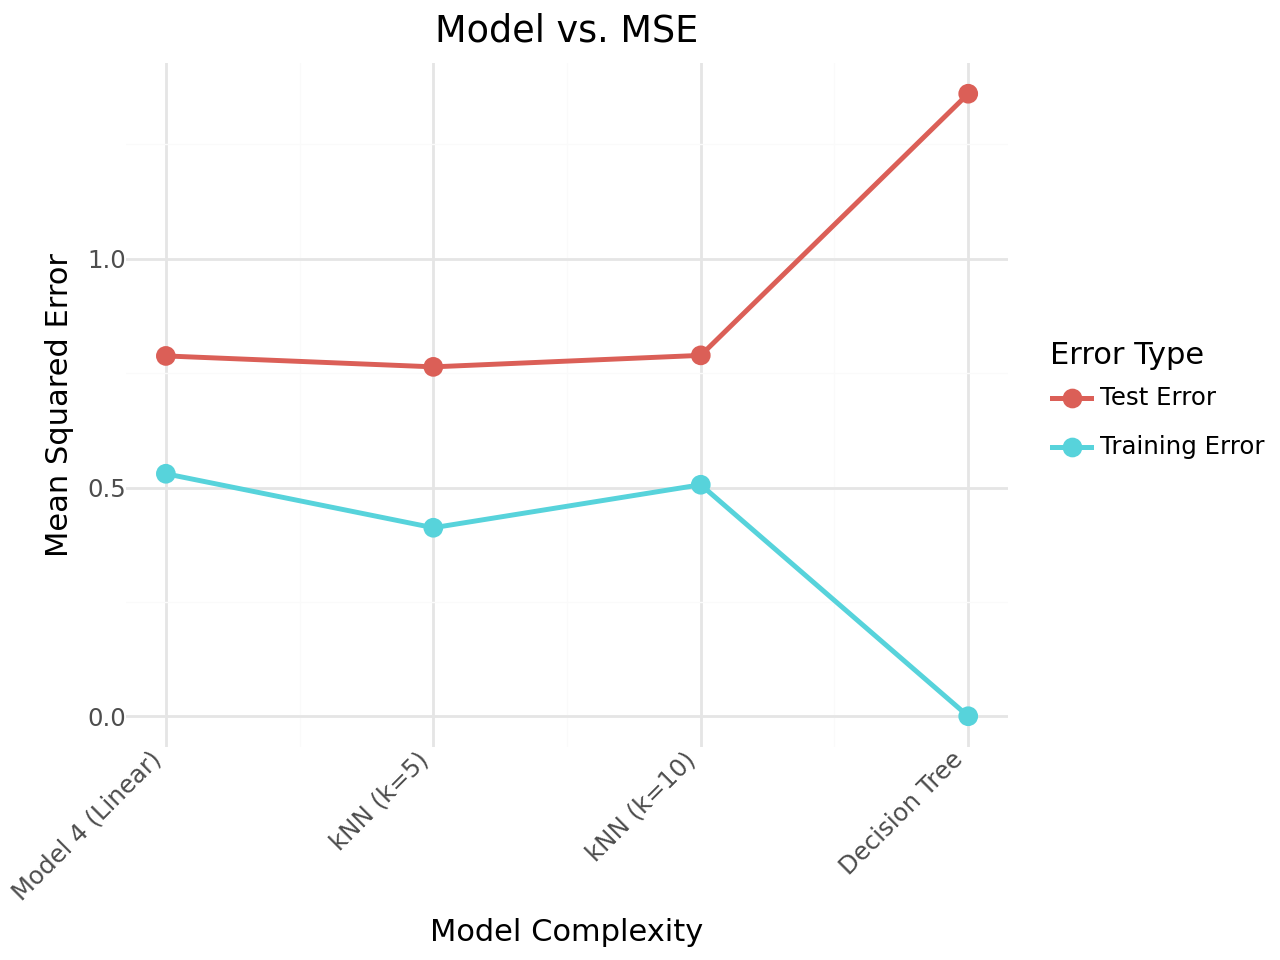

In [9]:
#Create a plot like the right plot of Fig 1. in our Model Validation chapter with the training and test error plotted for each of your four models.
# I need to fix data from melt to long format to plot better
plot_data = results_df.melt(
    id_vars=['Model', 'Model_Number'],
    value_vars=['Training_MSE', 'Test_MSE'],
    var_name='Error_Type',
    value_name='MSE'
)

plot_data['Error_Type'] = plot_data['Error_Type'].str.replace('_MSE', ' Error')

validation_plot = (ggplot(plot_data, aes(x='Model_Number', y='MSE', color='Error_Type')) +
                   geom_point(size=3) +
                   geom_line(aes(group='Error_Type'), size=1) +
                   labs(title='Model vs. MSE',
                        x='Model Complexity',
                        y='Mean Squared Error',
                        color='Error Type') +
                   scale_x_continuous(breaks=[1, 2, 3, 4],
                                      labels=['Model 4 (Linear)', 'kNN (k=5)', 'kNN (k=10)', 'Decision Tree']) +
                   theme_minimal() +
                   theme(axis_text_x=element_text(angle=45, hjust=1)))

validation_plot

In [11]:
# Which of your models was best?
best_model_idx = results_df['Test_MSE'].idxmin()
best_model = results_df.loc[best_model_idx, 'Model']
best_model

'kNN (k=5)'